<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/Imagenes_Perceptron_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd
df = pd.DataFrame(mnist.data)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


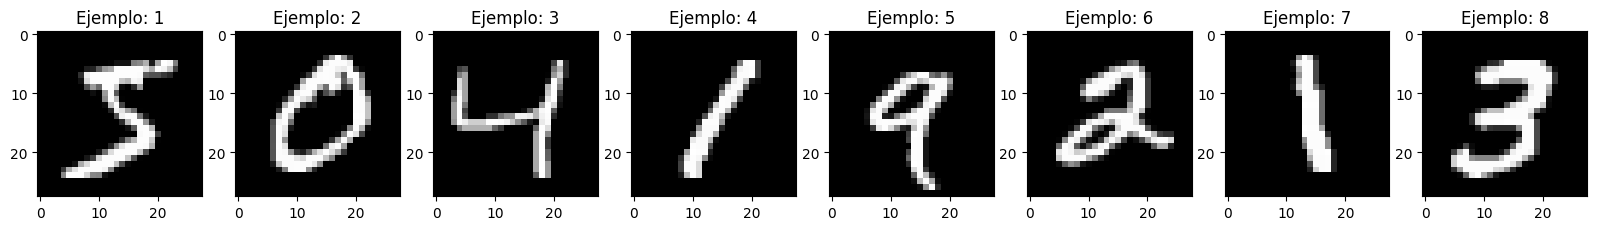

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8].values):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.15)

In [7]:
print(len(X_train))
print(len(X_test))

59500
10500


In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [9]:
# Número de capas del perceptrón multicapa
clf.n_layers_

3

In [10]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_

10

In [11]:
784 * 10 + 10

7850

In [12]:
# Número de parámetros que forman el modelo
clf.coefs_[0].shape

(784, 10)

In [13]:
# Dimensiones de la primera capa (hidden layer)
clf.coefs_[1]

array([[-1.41072192,  1.85231708, -0.78540937,  0.18264099, -2.47516678,
         0.11360258, -1.48879283,  1.58778824,  1.53228025,  1.77520677],
       [ 2.0555055 , -1.97457798,  0.79639335, -1.81715049,  0.89256005,
        -1.44774259,  1.15239842,  2.03053908, -1.98651653,  0.51803146],
       [ 2.28850246,  1.28586595, -1.05394591,  0.16827275, -0.93193125,
         2.12633086,  0.51364488, -1.10261239, -1.46672929, -1.30290675],
       [-1.40200159,  1.5559367 ,  2.01779345,  2.05966068, -1.49422626,
        -1.16290221,  1.31983083,  0.60863625, -1.20237044, -1.6970645 ],
       [ 1.35880331, -2.27171241, -1.78406333,  1.29893118,  0.37568089,
         0.71576346, -1.53432498,  1.5418506 ,  0.99445495,  0.46556653],
       [-1.49995757, -0.77862529, -0.9535433 ,  2.34689994,  1.10257949,
         2.16298547, -0.95067497, -1.01117985, -1.93895201,  1.32446369],
       [ 0.64765891, -1.41680999,  2.01438442,  0.64570859, -0.17649247,
        -0.35261762, -1.93820431, -1.92125843

In [14]:
# Dimensiones de la segunda capa (output layer)
clf.coefs_[1].shape

(10, 10)

In [15]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [17]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.888503007827051

In [18]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

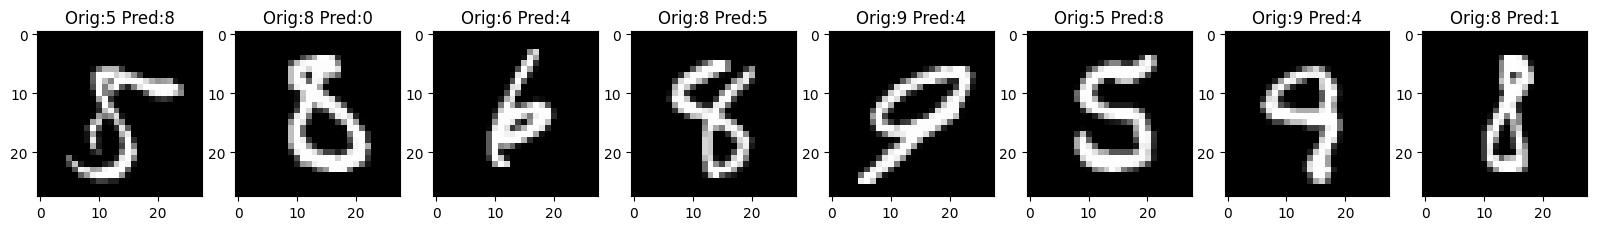

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test.iloc[img_index].values, (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test.iloc[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()